In [1]:
import numpy as np
print(np.__version__)
print(np.__path__)

1.22.0
['/Users/michaelwiedermann/opt/anaconda3/lib/python3.9/site-packages/numpy']


In [2]:
heights = np.loadtxt("https://raw.githubusercontent.com/gagolews/" +
    "teaching-data/master/marek/nhanes_adult_female_height_2020.txt")

In [3]:
np.random.choice(heights, 24, replace=False)

array([183.7, 155. , 152.7, 151.7, 155.6, 144.6, 167.5, 158.4, 155.9,
       168.7, 163.8, 154.5, 180. , 153.6, 159.2, 167.1, 158.8, 156.4,
       156.4, 160.6, 152.9, 171.5, 162.4, 165.5])

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
sns.__version__  # FYI

'0.12.1'

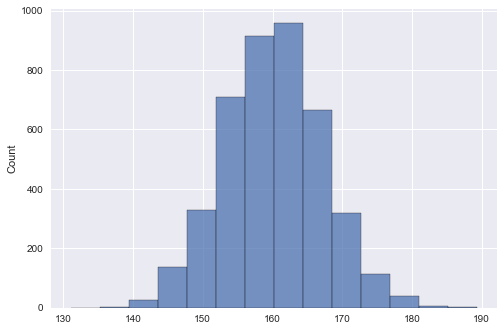

In [7]:
sns.histplot(heights, bins=14);

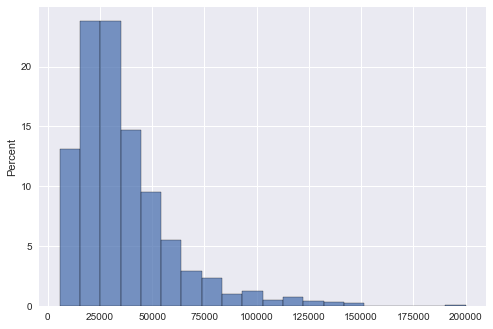

In [8]:
income = np.loadtxt("https://raw.githubusercontent.com/gagolews/" +
    "teaching-data/master/marek/uk_income_simulated_2020.txt")
sns.histplot(income, stat="percent", bins=20); 

# stat="percent" normalises the bar heights so they sum to 100. 

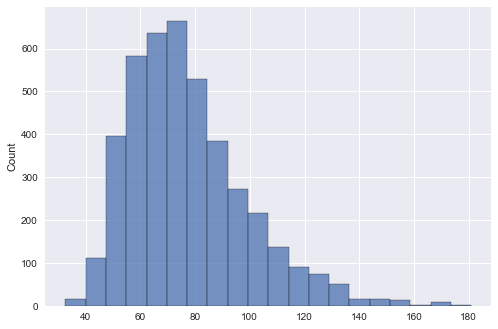

In [9]:
weights = np.loadtxt("https://raw.githubusercontent.com/gagolews/" +
    "teaching-data/master/marek/nhanes_adult_female_weight_2020.txt")
sns.histplot(weights, bins=20); 

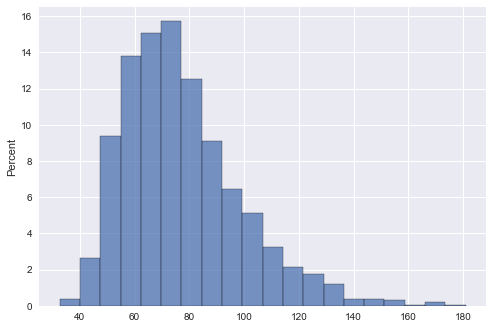

In [10]:
sns.histplot(weights,  stat="percent", bins=20);

# Weights normalised as a percentage.  

In [16]:
marathon = np.loadtxt("https://raw.githubusercontent.com/gagolews/" +
    "teaching-data/master/marek/37_pzu_warsaw_marathon_mins.txt")

In [23]:
marathon[0:5]

array([129.32, 130.75, 130.97, 134.17, 134.68])

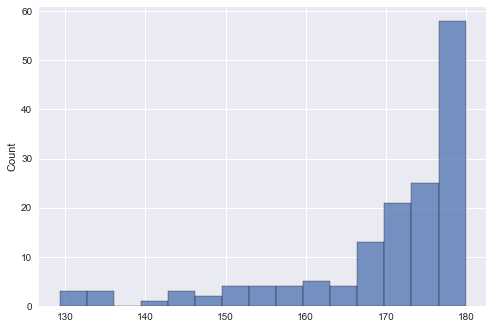

In [24]:
sns.histplot(marathon[marathon < 180]);

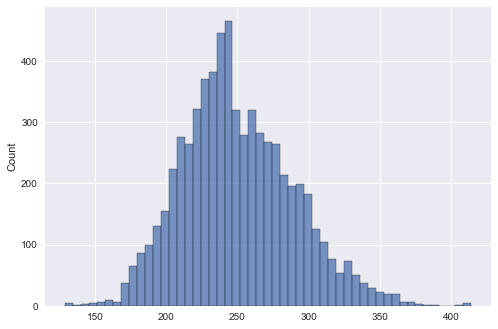

In [25]:
sns.histplot(marathon);

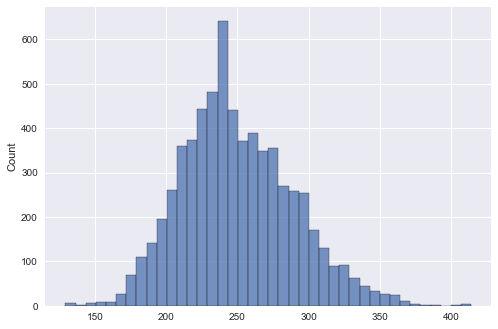

In [26]:
sns.histplot(marathon, bins=40);

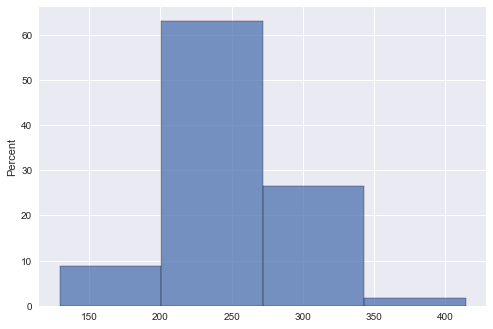

In [32]:
sns.histplot(marathon, stat='percent', bins=4);

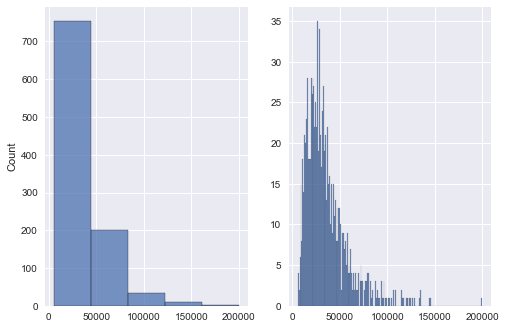

In [40]:
plt.subplot(121)  # 1 row, 2 columns, 1st plot
sns.histplot(income, bins=5)
plt.subplot(122)  # 1 row, 2 columns, 2nd plot
sns.histplot(income, bins=200)
plt.ylabel(None)
plt.show()

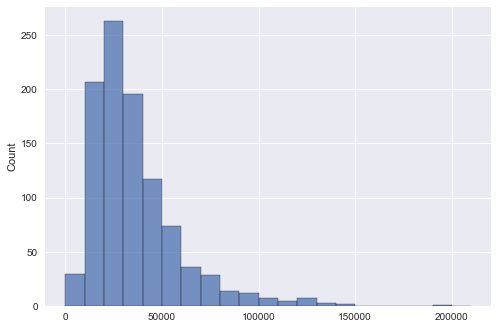

In [52]:
sns.histplot(income, binwidth=10000, binrange=(0,210000));

# Plotting each bin size = 10,000

In [63]:
m_data = np.histogram(marathon)

In [57]:
import matplotlib.pyplot as plt

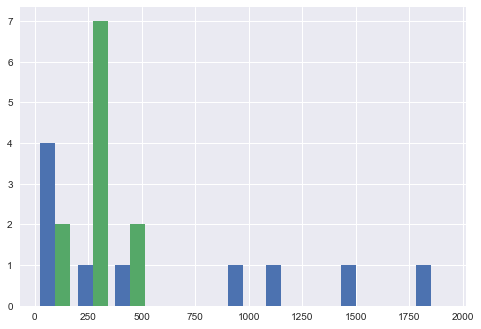

In [65]:
plt.hist(m_data, bins='auto');

In [66]:
# Sometimes, the data that we get access to have already been binned by somebody else.

peds = np.loadtxt("https://raw.githubusercontent.com/gagolews/" +
    "teaching-data/master/marek/southern_cross_station_peds_2019_dec.txt")
peds

array([  31.22580645,   18.38709677,   11.77419355,    8.48387097,
          8.58064516,   58.70967742,  332.93548387, 1121.96774194,
       2061.87096774, 1253.41935484,  531.64516129,  502.35483871,
        899.06451613,  775.        ,  614.87096774,  825.06451613,
       1542.74193548, 1870.48387097,  884.38709677,  345.83870968,
        203.48387097,  150.4516129 ,  135.67741935,   94.03225806])

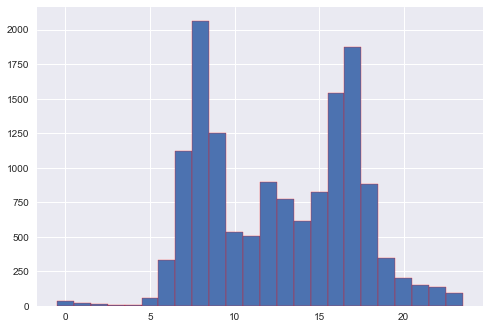

In [68]:
# We cannot thus use seaborn.histplot to depict them. 
# Instead, we can rely on a more low-level function, matplotlib.pyplot.bar:

plt.bar(np.arange(0, 24), width=1, height=peds, edgecolor="red");

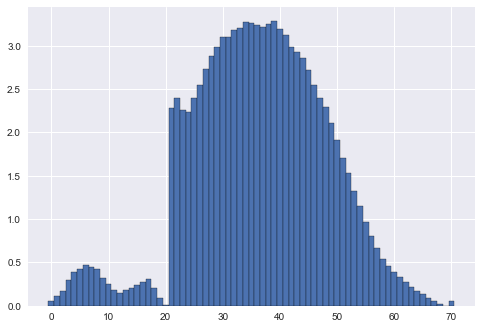

In [70]:
matura = np.loadtxt("https://raw.githubusercontent.com/gagolews/" +
    "teaching-data/master/marek/matura_2019_polish.txt")
plt.bar(np.arange(0, 71), width=1, height=matura, edgecolor="black");

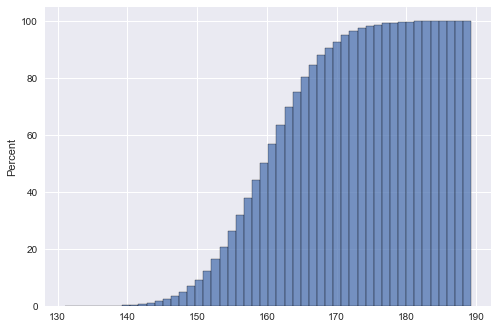

In [71]:
sns.histplot(heights, stat="percent", cumulative=True);

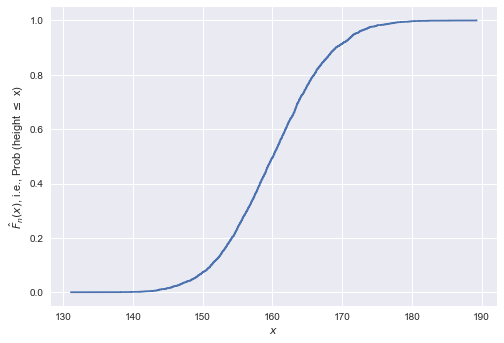

In [73]:
# Very similar is the plot of the empirical cumulative distribution function (ECDF), which we denote as ^Fn:

n = len(heights)
heights_sorted = np.sort(heights)
plt.plot(heights_sorted, np.arange(1, n+1)/n, drawstyle="steps-post")
plt.xlabel("$x$")
plt.ylabel("$\\hat{F}_n(x)$, i.e., Prob (height $\\leq$ x)");

At any given point x, ^Fn(x) is a step function (we cannot see the steps here, because the points are too plentiful) that gives the proportion of observations in our sample that are not greater than x.

Note that drawing the ECDF does not involve binning – we only need to arrange the observations in ascending order. Then, the arithmetic progression 1/n, 2/n, ... n is plotted against them.

In [74]:
# Consider the dataset on the populations of cities in the 2000 US Census: 

cities = np.loadtxt("https://raw.githubusercontent.com/gagolews/" +
    "teaching-data/master/other/us_cities_2000.txt")

In [75]:
large_cities = cities[cities >= 10000]
large_cities[-5:]

array([1517550., 1953633., 2896047., 3694742., 8008654.])

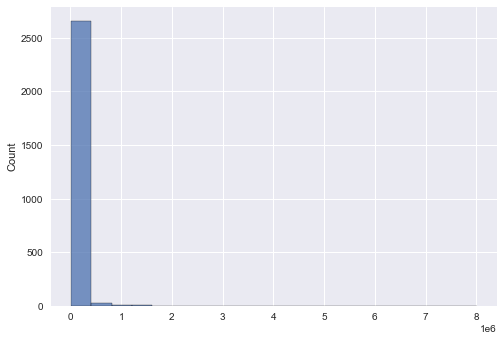

In [76]:
sns.histplot(large_cities, bins=20);

The above is basically unreadable because the distribution is not just right-skewed. It is extremely heavy-tailed: most cities are small, and those that are large – such as New York – are really unique. Had we plotted the whole dataset (cities instead of large_cities), the results' intelligibility would be even worse.

This is why we should instead draw such a distribution on the logarithmic scale:

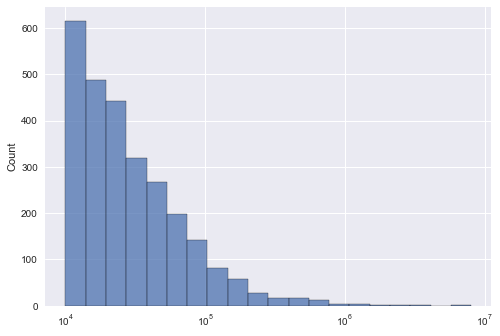

In [78]:
sns.histplot(large_cities, bins=20, log_scale=True);

In [80]:
# Back to UK Income Data

b = [0, 10000, 20000, 30000, 40000, 50000, 60000, 80000, np.inf]  # bin bounds
c = np.histogram(income, bins=b)[0]  # counts
for i in range(len(c)):
    print(f"{b[i]:5}-{b[i+1]:5}: {c[i]:4}")

    0-10000:   29
10000-20000:  207
20000-30000:  263
30000-40000:  196
40000-50000:  117
50000-60000:   74
60000-80000:   64
80000-  inf:   50


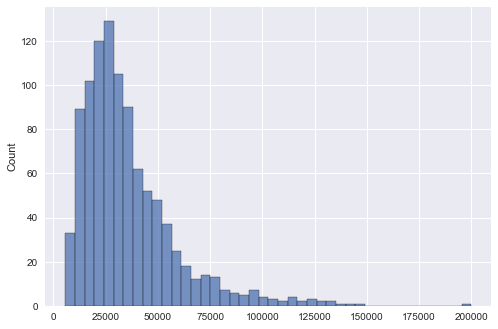

In [83]:
sns.histplot(income);

In [84]:
income_sorted = np.sort(income)
income_sorted[0], income_sorted[-1]  # the minimum and the maximum

(5750.0, 199969.0)

In [85]:
np.mean(income), np.median(income)

(35779.994, 30042.0)

The arithmetic mean is strongly influenced by very large or very small observations (which in some contexts we refer to as outliers). For instance, assume that we are adding one billionaire to the income dataset:

In [87]:
income2 = np.append(income, [1_000_000_000])
np.mean(income2), np.median(income2)

(1034745.2487512487, 30076.0)